In [1]:
import glob

import numpy as np
import scikit_posthocs as sp
import scipy.stats as ss
import pandas as pd
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
cols_baard = [
    '#81C784',  # Stage 1  
    '#4CAF50',  # Stage 2
    '#388E3C'   # Stage 3
]
cols = [
    '#b166d0',  # magnet
    '#2196f3',  # rc
    '#F9A825',  # lid
    '#ff1744',  # fs
    '#388E3C',  # baard
]

In [3]:
df = pd.read_csv('full_results.csv')

name_nicely = {
    "banknote": "Banknote",
    "breastcancer": "BrCancer",
    "cifar10": "CIFAR-10",
    "htru2": "HTRU2",
    "mnist": "MNIST",
    "dnn": "DNN",
    "resnet": "ResNet",
    "svm": "SVM",
    "tree": "Tree",
    "vgg": "VGG",
    "baard": "BAARD",
    "fs": "FS",
    "lid": "LID",
    "magnet": "MagNet",
    "rc": "RC"
}
df['defence'] = df['defence'].map(name_nicely)
df['data'] = df['data'].map(name_nicely)
df['model'] = df['model'].map(name_nicely)

df.head()

,data,model,attack,adv_param,defence,acc_no_def,acc_on_adv,fpr
0,Banknote,DNN,apgd,0.05,BAARD,0.688442,0.924623,0.000000
1,Banknote,DNN,apgd,0.05,BAARD,0.728643,0.939698,0.020101
2,Banknote,DNN,apgd,0.05,BAARD,0.722222,0.904040,0.005051
3,Banknote,DNN,apgd,0.05,BAARD,0.761421,0.923858,0.010152
4,Banknote,DNN,apgd,0.05,BAARD,0.761421,0.923858,0.010152


In [4]:
hue_order = ['MagNet', 'RC', 'LID', 'FS', 'BAARD']

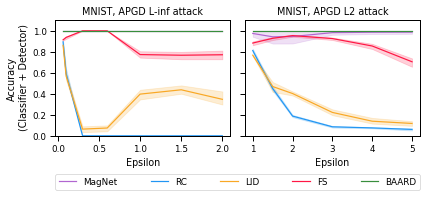

In [13]:
sns.set_context('paper')
f, ax = plt.subplots(1,2, figsize=(6, 2.5))

data1 = df[(df['data'] == 'MNIST') & (df['attack'] == 'apgd')]
s1 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data1, 
    palette=cols, hue_order=hue_order, ax=ax[0])
s1.set(xlabel='Epsilon', ylabel="Accuracy\n (Classifier + Detector)")
s1.legend_.remove()
ax[0].set(ylim=(0, 1.1))
ax[0].set_title('MNIST, APGD L-inf attack')

data2 = df[(df['data'] == 'MNIST') & (df['attack'] == 'apgd2')]
s2 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data2, 
    palette=cols, hue_order=hue_order, ax=ax[1])
s2.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s2.legend_.remove()
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('MNIST, APGD L2 attack')

plt.tight_layout(pad=1)
bb = (
    f.subplotpars.left, 
    f.subplotpars.bottom - 0.3, 
    f.subplotpars.right - f.subplotpars.left,
    .1
)
plt.legend(bbox_to_anchor=bb, loc='lower left', ncol=5, mode="expand", 
    borderaxespad=0., bbox_transform=f.transFigure)
plt.savefig('lineplot_mnist_apgd_acc.pdf', format='pdf', dpi=1200, bbox_inches='tight')

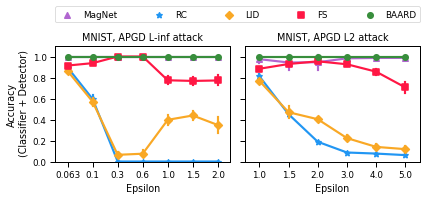

In [6]:
sns.set_context('paper')
m = ['^', '*', 'D', 's', 'o']

f, ax = plt.subplots(1,2, figsize=(6, 2.5))

data1 = df[(df['data'] == 'MNIST') & (df['attack'] == 'apgd')]
s1 = sns.pointplot(x='adv_param', y='acc_on_adv', hue='defence', data=data1, 
    palette=cols, hue_order=hue_order, ax=ax[0], 
    ci='sd', markers=m)
s1.set(xlabel='Epsilon', ylabel="Accuracy\n (Classifier + Detector)")
s1.legend_.remove()
ax[0].set(ylim=(0, 1.1))
ax[0].set_title('MNIST, APGD L-inf attack')

data2 = df[(df['data'] == 'MNIST') & (df['attack'] == 'apgd2')]
s2 = sns.pointplot(x='adv_param', y='acc_on_adv', hue='defence', data=data2, 
    palette=cols, hue_order=hue_order, ax=ax[1], 
    ci='sd', markers=m)
s2.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s2.legend_.remove()
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('MNIST, APGD L2 attack')

plt.tight_layout(pad=1)
bb = (
    f.subplotpars.left, 
    f.subplotpars.top + 0.12, 
    f.subplotpars.right - f.subplotpars.left,
    .1
)
plt.legend(bbox_to_anchor=bb, loc='upper left', ncol=6, mode="expand", 
    borderaxespad=0., bbox_transform=f.transFigure)
plt.savefig('pointplot_mnist_apgd_acc.pdf', format='pdf', dpi=1200, bbox_inches='tight')

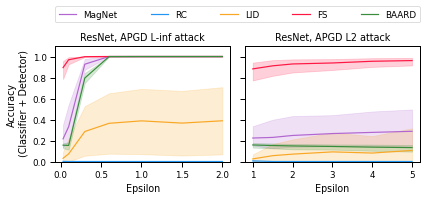

In [7]:
sns.set_context('paper')
f, ax = plt.subplots(1,2, figsize=(6, 2.5))

data1 = df[(df['model'] == 'ResNet') & (df['attack'] == 'apgd')]
s1 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data1, 
    palette=cols, hue_order=hue_order, ax=ax[0])
s1.set(xlabel='Epsilon', ylabel="Accuracy\n (Classifier + Detector)")
s1.legend_.remove()
ax[0].set(ylim=(0, 1.1))
ax[0].set_title('ResNet, APGD L-inf attack')

data2 = df[(df['model'] == 'ResNet') & (df['attack'] == 'apgd2')]
s2 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data2, 
    palette=cols, hue_order=hue_order, ax=ax[1])
s2.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s2.legend_.remove()
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('ResNet, APGD L2 attack')

plt.tight_layout(pad=1)
bb = (
    f.subplotpars.left, 
    f.subplotpars.top + 0.12, 
    f.subplotpars.right - f.subplotpars.left,
    .1
)
plt.legend(bbox_to_anchor=bb, loc='upper left', ncol=6, mode="expand", borderaxespad=0., bbox_transform=f.transFigure)
plt.savefig('lineplot_cifar10_resnet_apgd_acc.pdf', format='pdf', dpi=1200, bbox_inches='tight')

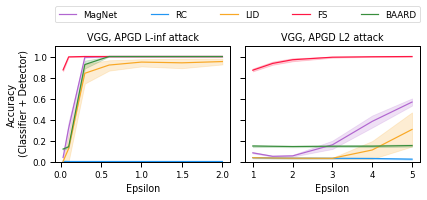

In [8]:
sns.set_context('paper')
f, ax = plt.subplots(1,2, figsize=(6, 2.5))

data1 = df[(df['model'] == 'VGG') & (df['attack'] == 'apgd')]
s1 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data1, 
    palette=cols, hue_order=hue_order, ax=ax[0])
s1.set(xlabel='Epsilon', ylabel="Accuracy\n (Classifier + Detector)")
s1.legend_.remove()
ax[0].set(ylim=(0, 1.1))
ax[0].set_title('VGG, APGD L-inf attack')

data2 = df[(df['model'] == 'VGG') & (df['attack'] == 'apgd2')]
s2 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data2, 
    palette=cols, hue_order=hue_order, ax=ax[1])
s2.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s2.legend_.remove()
ax[1].set(ylim=(0, 1.1))
ax[1].set_title('VGG, APGD L2 attack')

plt.tight_layout(pad=1)
bb = (
    f.subplotpars.left, 
    f.subplotpars.top + 0.12, 
    f.subplotpars.right - f.subplotpars.left,
    .1
)
plt.legend(bbox_to_anchor=bb, loc='upper left', ncol=6, mode="expand", borderaxespad=0., bbox_transform=f.transFigure)
plt.savefig('lineplot_cifar10_vgg_apgd_acc.pdf', format='pdf', dpi=1200, bbox_inches='tight')

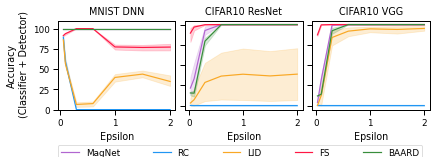

In [26]:
# MNIST, CIFAR10 ResNet, VGG - APGD L-inf
data0 = df[(df['data'] == 'MNIST') & (df['attack'] == 'apgd')]
data0['acc_on_adv'] = data0['acc_on_adv'] * 100.0
data1 = df[(df['model'] == 'ResNet') & (df['attack'] == 'apgd')]
data1['acc_on_adv'] = data1['acc_on_adv'] * 100.0
data2 = df[(df['model'] == 'VGG') & (df['attack'] == 'apgd')]
data2['acc_on_adv'] = data2['acc_on_adv'] * 100.0

sns.set_context('paper')
fig, ax = plt.subplots(1, 3, figsize=(6, 2))

s0 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data0, 
    palette=cols, hue_order=hue_order, ax=ax[0])
s0.set(xlabel='Epsilon', ylabel="Accuracy\n (Classifier + Detector)")
s0.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[0].set_title('MNIST DNN')

s1 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data1, 
    palette=cols, hue_order=hue_order, ax=ax[1])
s1.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s1.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[1].set_title('CIFAR10 ResNet')

s2 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data2, 
    palette=cols, hue_order=hue_order, ax=ax[2])
s2.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s2.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[2].set_title('CIFAR10 VGG')

plt.tight_layout(pad=0.5)
bb = (
    f.subplotpars.left, 
    f.subplotpars.bottom - 0.25, 
    f.subplotpars.right - f.subplotpars.left,
    .1
)
plt.legend(bbox_to_anchor=bb, loc='lower left', ncol=5, mode="expand", 
    borderaxespad=0., bbox_transform=f.transFigure)
plt.savefig('lineplot_img_apgd.pdf', format='pdf', dpi=1200, bbox_inches='tight')


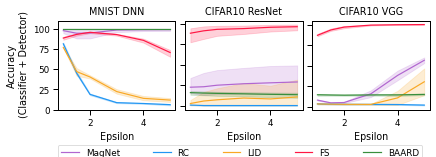

In [27]:
# MNIST, CIFAR10 ResNet, VGG - APGD L2
data0 = df[(df['data'] == 'MNIST') & (df['attack'] == 'apgd2')]
data0['acc_on_adv'] = data0['acc_on_adv'] * 100.0
data1 = df[(df['model'] == 'ResNet') & (df['attack'] == 'apgd2')]
data1['acc_on_adv'] = data1['acc_on_adv'] * 100.0
data2 = df[(df['model'] == 'VGG') & (df['attack'] == 'apgd2')]
data2['acc_on_adv'] = data2['acc_on_adv'] * 100.0

sns.set_context('paper')
fig, ax = plt.subplots(1, 3, figsize=(6, 2))

s0 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data0, 
    palette=cols, hue_order=hue_order, ax=ax[0])
s0.set(xlabel='Epsilon', ylabel="Accuracy\n (Classifier + Detector)")
s0.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[0].set_title('MNIST DNN')

s1 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data1, 
    palette=cols, hue_order=hue_order, ax=ax[1])
s1.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s1.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[1].set_title('CIFAR10 ResNet')

s2 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data2, 
    palette=cols, hue_order=hue_order, ax=ax[2])
s2.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s2.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[2].set_title('CIFAR10 VGG')

plt.tight_layout(pad=0.5)
bb = (
    f.subplotpars.left, 
    f.subplotpars.bottom - 0.25, 
    f.subplotpars.right - f.subplotpars.left,
    .1
)
plt.legend(bbox_to_anchor=bb, loc='lower left', ncol=5, mode="expand", 
    borderaxespad=0., bbox_transform=f.transFigure)
plt.savefig('lineplot_img_apgd2.pdf', format='pdf', dpi=1200, bbox_inches='tight')


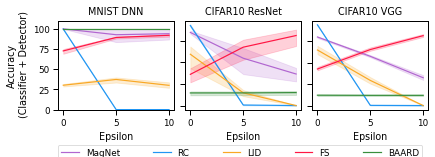

In [30]:
# MNIST, CIFAR10 ResNet, VGG - APGD L2
data0 = df[(df['data'] == 'MNIST') & (df['attack'] == 'cw2')]
data0['acc_on_adv'] = data0['acc_on_adv'] * 100.0
data1 = df[(df['model'] == 'ResNet') & (df['attack'] == 'cw2')]
data1['acc_on_adv'] = data1['acc_on_adv'] * 100.0
data2 = df[(df['model'] == 'VGG') & (df['attack'] == 'cw2')]
data2['acc_on_adv'] = data2['acc_on_adv'] * 100.0

sns.set_context('paper')
fig, ax = plt.subplots(1, 3, figsize=(6, 2))

s0 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data0, 
    palette=cols, hue_order=hue_order, ax=ax[0])
s0.set(xlabel='Epsilon', ylabel="Accuracy\n (Classifier + Detector)")
s0.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[0].set_title('MNIST DNN')

s1 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data1, 
    palette=cols, hue_order=hue_order, ax=ax[1])
s1.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s1.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[1].set_title('CIFAR10 ResNet')

s2 = sns.lineplot(x='adv_param', y='acc_on_adv', hue='defence', data=data2, 
    palette=cols, hue_order=hue_order, ax=ax[2])
s2.set(xlabel='Epsilon', ylabel=None, yticklabels=[])
s2.legend_.remove()
ax[0].set(ylim=(0., 110.))
ax[2].set_title('CIFAR10 VGG')

plt.tight_layout(pad=0.5)
bb = (
    f.subplotpars.left, 
    f.subplotpars.bottom - 0.25, 
    f.subplotpars.right - f.subplotpars.left,
    .1
)
plt.legend(bbox_to_anchor=bb, loc='lower left', ncol=5, mode="expand", 
    borderaxespad=0., bbox_transform=f.transFigure)
plt.savefig('lineplot_img_cw2.pdf', format='pdf', dpi=1200, bbox_inches='tight')